DAB103- Project#1 --> CO2 Emission in Canada due to Vehicles

Mounting the drive to access the data file

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


Checking the content inside the path to ensure we have the required data sheet

In [2]:
ls /content/drive/MyDrive/DAB103/*

/content/drive/MyDrive/DAB103/Churn-Modelling.csv
/content/drive/MyDrive/DAB103/train.csv

/content/drive/MyDrive/DAB103/project1:
'CO2 Emissions_Canada.csv'


Importing the required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots

Opening the csv file using pandas for further processing.

In [4]:
co2 = pd.read_csv("/content/drive/MyDrive/DAB103/project1/CO2 Emissions_Canada.csv")
co2

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Checking the type of the data

In [5]:
type(co2)

pandas.core.frame.DataFrame

In [6]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

Checking the shape of the dataset

In [7]:
co2.shape

(7385, 12)

Glimpse of first few observations in the dataset :

In [8]:
co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Glimpse of last few lines of the dataset :

In [9]:
co2.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


Checking the mean and other statistical values for each variables present in the dataset :

In [10]:
co2.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Verifying if the dataset has any null entries in it 

In [11]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Checking the unique values in each variable to find which can be used as a categorical data.

In [12]:
co2.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

Correlation of all the variables :

In [13]:
co2.corr()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


Creating a heatmap with correaltion :

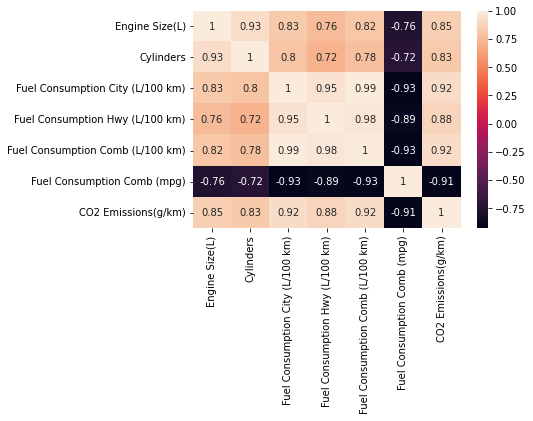

In [14]:
sns.heatmap(co2.corr(), annot=True)

Plot to describe the distrubution of different fuel types.

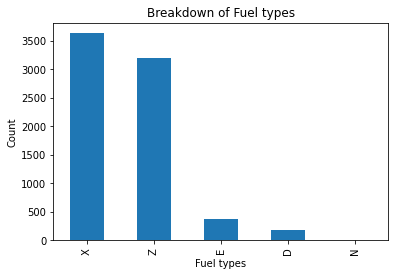

In [15]:
co2['Fuel Type'].value_counts().plot(kind='bar',xlabel="Fuel types", ylabel="Count", title="Breakdown of Fuel types")

Plot to see the distrubution of vehicles by cylinder size.

In [16]:
p2 = co2.groupby(['Cylinders']).size(); 
p2

Cylinders
3       95
4     3220
5       26
6     2446
8     1402
10      42
12     151
16       3
dtype: int64

Distrubution of vehicles with different cylinder types.

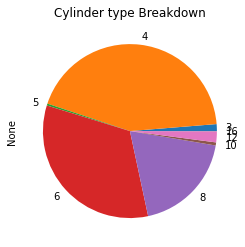

In [17]:
p2.plot(kind="pie", title="Cylinder type Breakdown")

Replacing the delimiters and removing "(" and ")" for better usage.

In [18]:
co2.columns = [c.replace(' ', '_') for c in co2.columns]
co2.columns = [c.replace('(', '') for c in co2.columns]
co2.columns = [c.replace(')', '') for c in co2.columns]
co2.columns = [c.replace('/', '') for c in co2.columns]
co2

,Make,Model,Vehicle_Class,Engine_SizeL,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Consumption_Comb_L100_km,Fuel_Consumption_Comb_mpg,CO2_Emissionsgkm
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Plot to describe the distribution of CO2 emission.

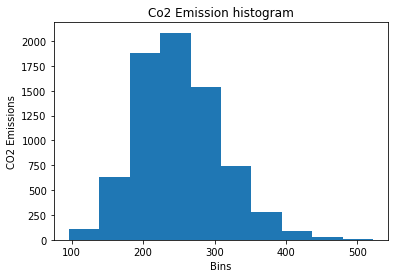

In [19]:
plt.hist(co2.CO2_Emissionsgkm)
plt.xlabel('Bins')
plt.ylabel('CO2 Emissions')
plt.title("Co2 Emission histogram")
plt.show()

Plot to describe the relationship of CO2 emission with vehicles with different number of cylinders.

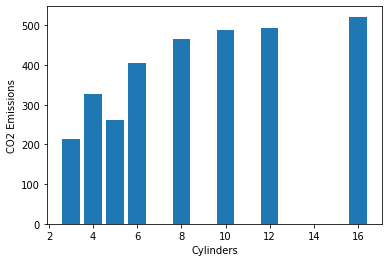

In [20]:
plt.bar(co2.Cylinders, co2.CO2_Emissionsgkm)
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

Plot to see which fuel type constitutes the highest amount of CO2 emission.

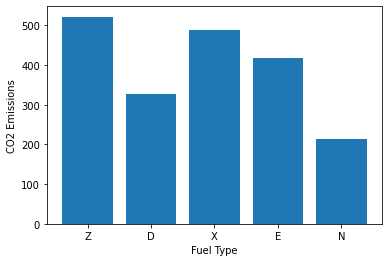

In [21]:
plt.bar(co2.Fuel_Type, co2.CO2_Emissionsgkm)
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions')
plt.show()

A scatter plot describing the correlation of fuel consumption in City and Highway and the amount of CO2 emission in them respecitvely.

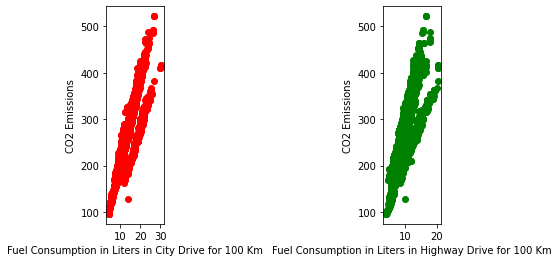

In [22]:
plt.subplot(1,5,1)
plt.scatter(co2.Fuel_Consumption_City_L100_km, co2.CO2_Emissionsgkm ,c='r')
plt.xlabel('Fuel Consumption in Liters in City Drive for 100 Km')
plt.ylabel('CO2 Emissions')
plt.subplot(1,5,5)
plt.scatter(co2.Fuel_Consumption_Hwy_L100_km, co2.CO2_Emissionsgkm, color='g' )
plt.xlabel('Fuel Consumption in Liters in Highway Drive for 100 Km')
plt.ylabel('CO2 Emissions')
plt.show()

Descriptive Statistics#

In [23]:
Q1=co2['CO2_Emissionsgkm'].quantile(0.25)
Q3=co2['CO2_Emissionsgkm'].quantile(0.75)
IQR=Q3-Q1
Q3+1.5*IQR

408.0

In [24]:
# Outlier Treatment
Q3=co2.quantile(0.75)
IQR=Q3-Q1
co2_edit = co2.loc[co2['CO2_Emissionsgkm']<= 408]

Data Cleaning#


We only have one observation for the fuel type "N".
It is tough to conclude the analysis with a single observation, this looks like a potential outliner and removing this from the data set.

.

In [25]:
co2[:][co2['Fuel_Type'] == 'N']

,Make,Model,Vehicle_Class,Engine_SizeL,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Consumption_Comb_L100_km,Fuel_Consumption_Comb_mpg,CO2_Emissionsgkm
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,N,15.2,9.5,12.7,22,213


In [26]:
co2.shape

(7385, 12)

Removed the observation with Fuel type N

In [27]:
co2 = co2.drop(co2[co2.Fuel_Type == 'N'].index)

In [28]:
co2[:][co2['Fuel_Type'] == 'N']

,Make,Model,Vehicle_Class,Engine_SizeL,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Consumption_Comb_L100_km,Fuel_Consumption_Comb_mpg,CO2_Emissionsgkm


In [29]:
co2.shape

(7384, 12)

Data Transformation#

Seggrigate the Co2 emmissions by labeling them with various levels High, medium, low.

Checking the quartile range of Co2 emission to categorize the data to Low, Medium and High Co2 emission vehicles.

In [30]:
co2.describe()

,Engine_SizeL,Cylinders,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Consumption_Comb_L100_km,Fuel_Consumption_Comb_mpg,CO2_Emissionsgkm
count,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000,7384.000000
mean,3.160008,5.614978,12.556176,9.041644,10.974837,27.482394,250.589789
std,1.354252,1.828425,3.500376,2.224601,2.892633,7.232088,58.515007
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [31]:
co2[:][(co2['CO2_Emissionsgkm'] < 208)].count()

Make                             1836
Model                            1836
Vehicle_Class                    1836
Engine_SizeL                     1836
Cylinders                        1836
Transmission                     1836
Fuel_Type                        1836
Fuel_Consumption_City_L100_km    1836
Fuel_Consumption_Hwy_L100_km     1836
Fuel_Consumption_Comb_L100_km    1836
Fuel_Consumption_Comb_mpg        1836
CO2_Emissionsgkm                 1836
dtype: int64

In [32]:
co2[:][(co2['CO2_Emissionsgkm'] >= 208) & (co2['CO2_Emissionsgkm'] < 288)].count()

Make                             3666
Model                            3666
Vehicle_Class                    3666
Engine_SizeL                     3666
Cylinders                        3666
Transmission                     3666
Fuel_Type                        3666
Fuel_Consumption_City_L100_km    3666
Fuel_Consumption_Hwy_L100_km     3666
Fuel_Consumption_Comb_L100_km    3666
Fuel_Consumption_Comb_mpg        3666
CO2_Emissionsgkm                 3666
dtype: int64

In [33]:
co2[:][co2['CO2_Emissionsgkm']  >= 288].count()

Make                             1882
Model                            1882
Vehicle_Class                    1882
Engine_SizeL                     1882
Cylinders                        1882
Transmission                     1882
Fuel_Type                        1882
Fuel_Consumption_City_L100_km    1882
Fuel_Consumption_Hwy_L100_km     1882
Fuel_Consumption_Comb_L100_km    1882
Fuel_Consumption_Comb_mpg        1882
CO2_Emissionsgkm                 1882
dtype: int64

In [34]:
def emission_label(num):
  if num <= 208:
    return "Low"
  elif num <= 288:
    return "Medium"
  else:
    return "High"

In [35]:
co2["Co2_label"] = co2['CO2_Emissionsgkm'].apply(emission_label)

In [36]:
co2['Co2_label'].value_counts()

Medium    3674
Low       1870
High      1840
Name: Co2_label, dtype: int64

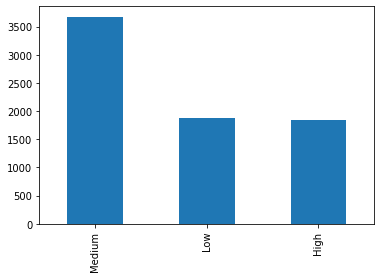

In [86]:
co2.Co2_label.value_counts().plot(kind='bar')

In [37]:
co2['Engine_SizeL'].groupby(by = co2.Cylinders)
emission_size = co2.groupby(by = 'Engine_SizeL')['Cylinders'].mean()
emission_size.describe()

count    51.000000
mean      6.994461
std       2.908803
min       3.000000
25%       4.000000
50%       6.192982
75%       8.000000
max      16.000000
Name: Cylinders, dtype: float64

In [38]:
def engine_size(num):
  if num <= 4:
    return "Small Engine"
  elif num <= 8:
    return "Medium Engine"
  else:
    return "Large Engine"

In [39]:
co2["Engine_size_label"] = co2['Engine_SizeL'].apply(engine_size)

In [76]:
co2['Engine_size_label'].value_counts()

Small Engine     5889
Medium Engine    1490
Large Engine        5
Name: Engine_size_label, dtype: int64

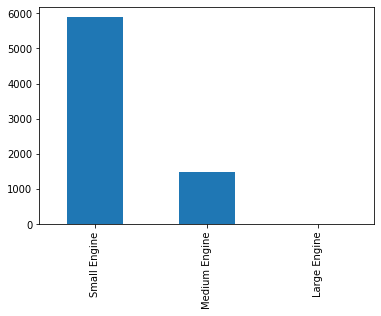

In [85]:
co2.Engine_size_label.value_counts().plot(kind='bar')

In [40]:
co2['CO2_Emissionsgkm'].describe()

count    7384.000000
mean      250.589789
std        58.515007
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       522.000000
Name: CO2_Emissionsgkm, dtype: float64

In [41]:
co2['Co2_label'].value_counts()

Medium    3674
Low       1870
High      1840
Name: Co2_label, dtype: int64

Transforming the "Transmission" variable to extract the Gear information. 

In [42]:
co2['Gears'] = co2['Transmission'].apply(lambda x:x[-1])
co2['Gears'].value_counts()

6    3258
8    1802
7    1026
9     419
5     307
V     295
0     210
4      67
Name: Gears, dtype: int64

In [43]:
co2['Gears'] = co2['Gears'].replace('V','0')


In [44]:
co2['Gears'].value_counts()

6    3258
8    1802
7    1026
0     505
9     419
5     307
4      67
Name: Gears, dtype: int64

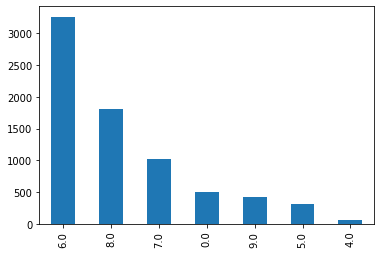

In [87]:
co2.Gears.value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



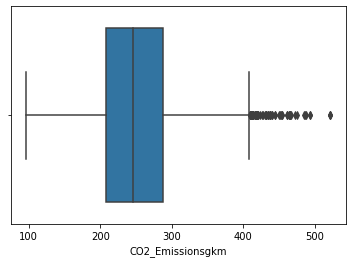

In [45]:
sns.boxplot(co2['CO2_Emissionsgkm'])

In [46]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7384 entries, 0 to 7384
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Make                           7384 non-null   object 
 1   Model                          7384 non-null   object 
 2   Vehicle_Class                  7384 non-null   object 
 3   Engine_SizeL                   7384 non-null   float64
 4   Cylinders                      7384 non-null   int64  
 5   Transmission                   7384 non-null   object 
 6   Fuel_Type                      7384 non-null   object 
 7   Fuel_Consumption_City_L100_km  7384 non-null   float64
 8   Fuel_Consumption_Hwy_L100_km   7384 non-null   float64
 9   Fuel_Consumption_Comb_L100_km  7384 non-null   float64
 10  Fuel_Consumption_Comb_mpg      7384 non-null   int64  
 11  CO2_Emissionsgkm               7384 non-null   int64  
 12  Co2_label                      7384 non-null   o

In [47]:
co2['Gears'] = co2['Gears'].astype(float, errors = 'raise')

ref:https://www.geeksforgeeks.org/python-pandas-dataframe-select_dtypes/

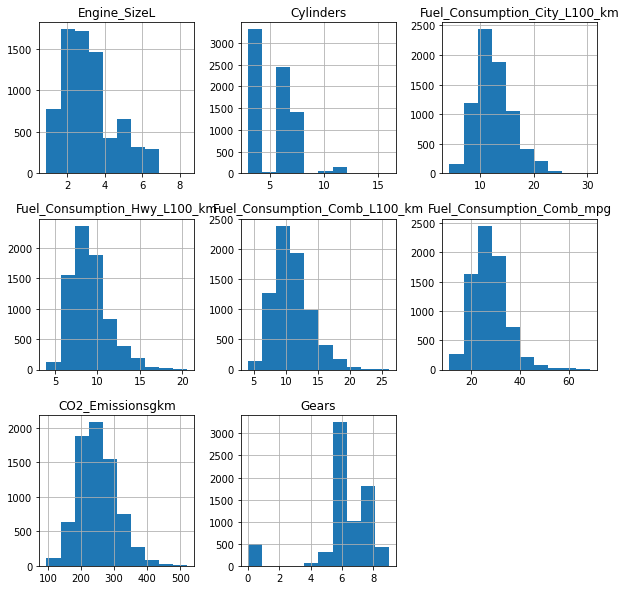

In [127]:
numerical_data = co2.select_dtypes(include = ['int64','float64'])
numerical_data.hist(figsize = (10,10))
plt.show()

In [49]:
Categorical = co2.select_dtypes(include=['object'])
Categorical.value_counts()
#Categorical[:][0].count().hist(figsize = (10,10))
#plt.show()

Make      Model                         Vehicle_Class          Transmission  Fuel_Type  Co2_label  Engine_size_label
FORD      EDGE AWD                      SUV - SMALL            AS6           X          Medium     Small Engine         12
LINCOLN   MKZ AWD                       MID-SIZE               AS6           X          Medium     Small Engine         11
INFINITI  Q50 AWD                       MID-SIZE               AS7           Z          Medium     Small Engine         11
FORD      ESCAPE AWD                    SUV - SMALL            AS6           X          Medium     Small Engine         10
MAZDA     CX-5                          SUV - SMALL            AS6           X          Low        Small Engine         10
                                                                                                                        ..
JAGUAR    F-TYPE P300 Coupe             TWO-SEATER             AS8           Z          Medium     Small Engine          1
          F-TYPE PROJE

Data Analysis#


Determine which vehicle type has highest consumption of fuel and largest release of Co2.

In [50]:
emission_vehicleclass = co2.groupby(by = 'Vehicle_Class')['CO2_Emissionsgkm'].mean()
emission_vehicleclass

Vehicle_Class
COMPACT                     216.679061
FULL-SIZE                   263.316119
MID-SIZE                    222.463781
MINICOMPACT                 236.607362
MINIVAN                     262.312500
PICKUP TRUCK - SMALL        278.968553
PICKUP TRUCK - STANDARD     301.513011
SPECIAL PURPOSE VEHICLE     237.597403
STATION WAGON - MID-SIZE    238.698113
STATION WAGON - SMALL       200.067460
SUBCOMPACT                  246.448845
SUV - SMALL                 236.292523
SUV - STANDARD              304.836735
TWO-SEATER                  277.454348
VAN - CARGO                 361.500000
VAN - PASSENGER             397.212121
Name: CO2_Emissionsgkm, dtype: float64

ref:https://stackoverflow.com/questions/37930693/how-can-i-make-a-barplot-and-a-lineplot-in-the-same-seaborn-plot-with-different

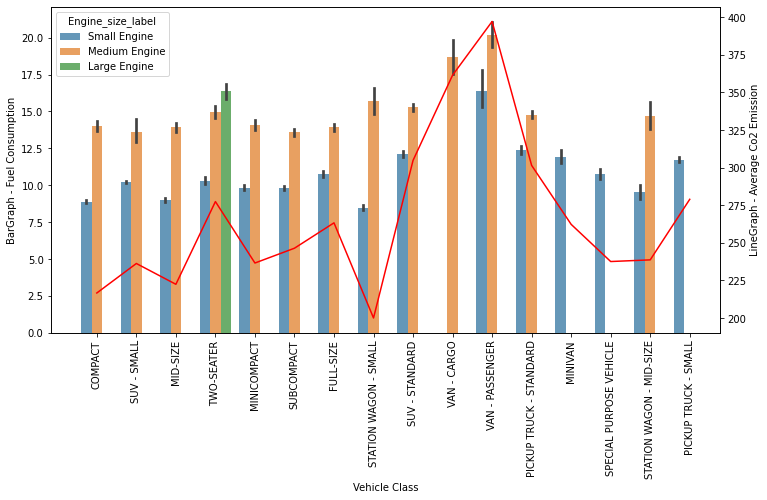

In [51]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(x=co2.Vehicle_Class, y=co2.Fuel_Consumption_Comb_L100_km, hue=co2.Engine_size_label, alpha=0.75, ax=ax1)
plt.xticks(rotation = 90)
plt.xlabel("Vehicle Class")
plt.ylabel("BarGraph - Fuel Consumption")
ax2 = ax1.twinx()
sns.lineplot(x=co2['Vehicle_Class'].unique(), y=emission_vehicleclass[co2['Vehicle_Class'].unique()], ax=ax2, color='red')
plt.ylabel("LineGraph - Average Co2 Emission")
fig.show()

In [52]:
high_emission = co2[:][co2['Co2_label']=='High' ]
high_emission.head()

,Make,Model,Vehicle_Class,Engine_SizeL,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Consumption_Comb_L100_km,Fuel_Consumption_Comb_mpg,CO2_Emissionsgkm,Co2_label,Engine_size_label,Gears
13,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359,High,Medium Engine,6.0
14,ASTON MARTIN,RAPIDE,SUBCOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359,High,Medium Engine,6.0
15,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338,High,Medium Engine,7.0
16,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,M6,Z,18.1,12.2,15.4,18,354,High,Medium Engine,6.0
17,ASTON MARTIN,V8 VANTAGE S,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338,High,Medium Engine,7.0


ref:https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position

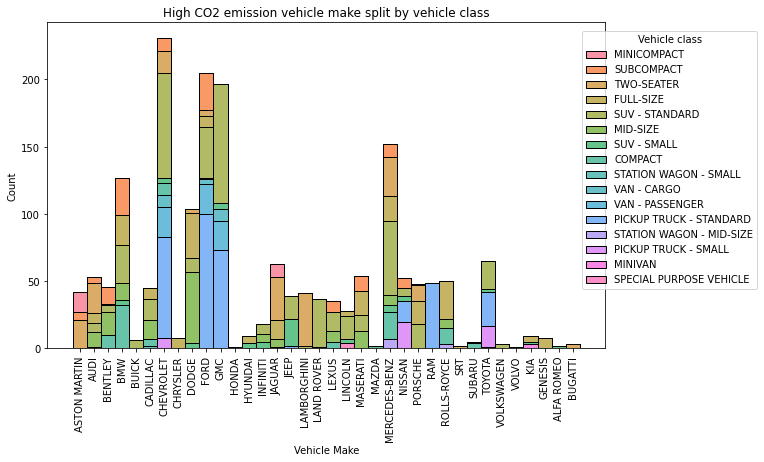

In [114]:
plt.figure(figsize=(10,6))
g=sns.histplot(x=high_emission.Make, hue=high_emission.Vehicle_Class, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.xlabel("Vehicle Make")
plt.title("High CO2 emission vehicle make split by vehicle class")
sns.move_legend(g, "upper left", bbox_to_anchor=(.95, .99), title='Vehicle class')
plt.show()

In [54]:
low_emission = co2[:][co2['Co2_label']=='Low' ]
low_emission.head()

,Make,Model,Vehicle_Class,Engine_SizeL,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Consumption_Comb_L100_km,Fuel_Consumption_Comb_mpg,CO2_Emissionsgkm,Co2_label,Engine_size_label,Gears
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,Low,Small Engine,5.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,Low,Small Engine,7.0
12,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193,Low,Small Engine,6.0
20,AUDI,A4,COMPACT,2.0,4,AV8,Z,9.9,7.4,8.8,32,202,Low,Small Engine,8.0
76,BMW,320i,COMPACT,2.0,4,A8,Z,10.0,6.5,8.4,34,193,Low,Small Engine,8.0


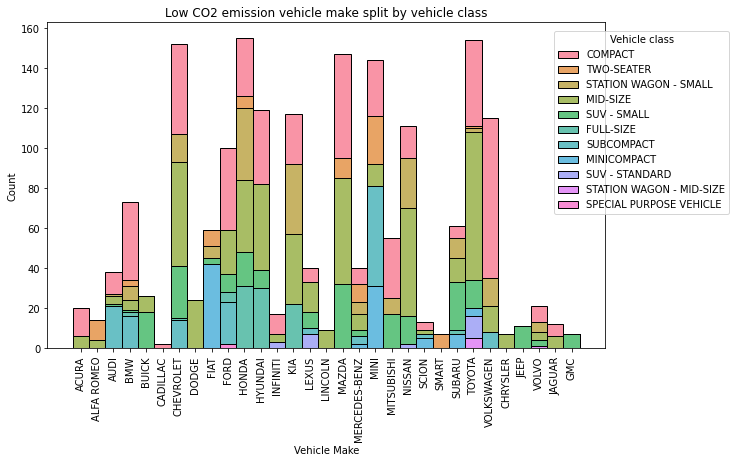

In [115]:
plt.figure(figsize=(10,6))
g=sns.histplot(x=low_emission.Make, hue=low_emission.Vehicle_Class, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.xlabel("Vehicle Make")
plt.title("Low CO2 emission vehicle make split by vehicle class")
sns.move_legend(g, "upper left", bbox_to_anchor=(0.9, .99), title='Vehicle class')
plt.show()

In [56]:
medium_emission = co2[:][co2['Co2_label']=='Medium' ]
medium_emission.head()

,Make,Model,Vehicle_Class,Engine_SizeL,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Consumption_Comb_L100_km,Fuel_Consumption_Comb_mpg,CO2_Emissionsgkm,Co2_label,Engine_size_label,Gears
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,Medium,Small Engine,6.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,Medium,Small Engine,6.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,Medium,Small Engine,6.0
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230,Medium,Small Engine,6.0
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232,Medium,Small Engine,6.0


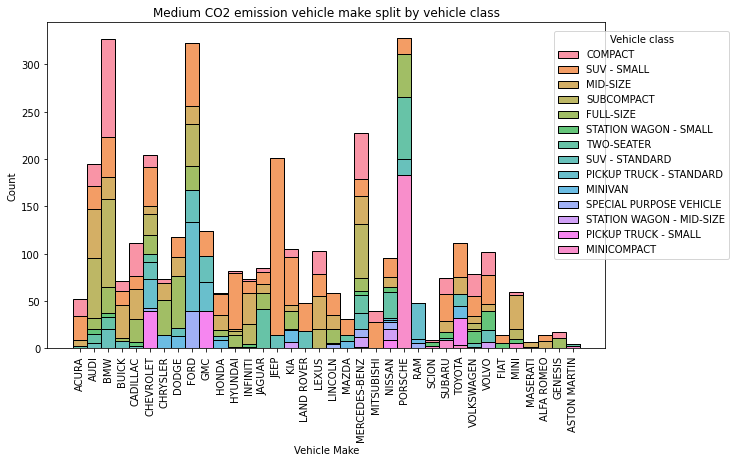

In [113]:
plt.figure(figsize=(10,6))
g=sns.histplot(x=medium_emission.Make, hue=medium_emission.Vehicle_Class, stat="count", multiple="stack")
plt.xticks(rotation=90)
plt.xlabel("Vehicle Make")
plt.title("Medium CO2 emission vehicle make split by vehicle class")
sns.move_legend(g, "upper left", bbox_to_anchor=(0.9, .99), title='Vehicle class')
plt.show()

What’s identify the optimized engine size and the no.of.cylinders with minimal release of Co2 ?

In [58]:
co2['Engine_size_label'].value_counts()

Small Engine     5889
Medium Engine    1490
Large Engine        5
Name: Engine_size_label, dtype: int64

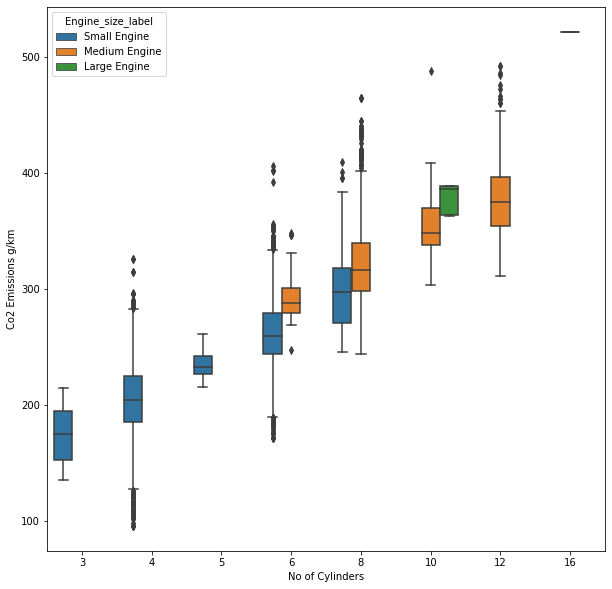

In [59]:
plt.figure(figsize = (10,10))
sns.boxplot(x=co2.Cylinders, y=co2.CO2_Emissionsgkm, hue=co2.Engine_size_label)
plt.xlabel("No of Cylinders")
plt.ylabel("Co2 Emissions g/km")
plt.show()

Which fuel type contributes to the maximum emission of Co2 in the atmosphere ?

ref: https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot
https://www.kite.com/python/answers/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python

In [60]:
co2.CO2_Emissionsgkm

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2_Emissionsgkm, Length: 7384, dtype: int64

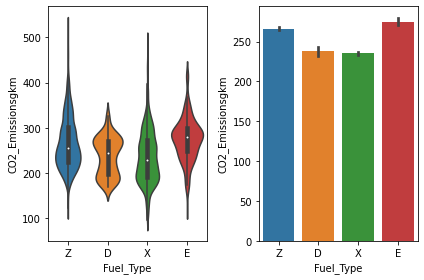

In [61]:
f, ax = plt.subplots(1,2)
sns.violinplot(x=co2.Fuel_Type, y=co2.CO2_Emissionsgkm, ax=ax[0])
sns.barplot(x=co2.Fuel_Type, y=co2.CO2_Emissionsgkm, ax=ax[1])
f.tight_layout()
plt.show()


What are the most influencing features that affect the CO2 emission the most?

ref: https://stackoverflow.com/questions/43943034/seaborn-python-xtick-labels-wont-rotate


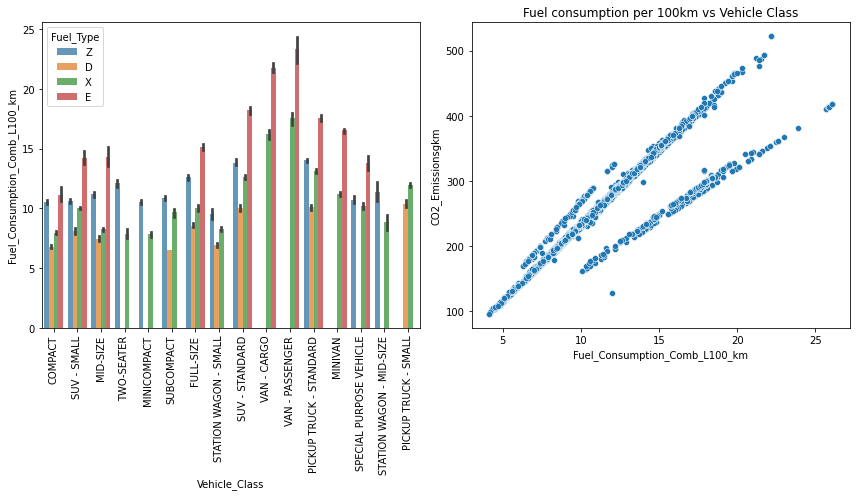

In [126]:
f, ax = plt.subplots(1,2,figsize=(12,7))
sns.barplot(x=co2.Vehicle_Class, y=co2.Fuel_Consumption_Comb_L100_km, alpha=0.75, hue=co2.Fuel_Type, ax=ax[0])
plt.setp(ax[0].get_xticklabels(), rotation=90)
sns.scatterplot(x=co2.Fuel_Consumption_Comb_L100_km, y=co2.CO2_Emissionsgkm, ax=ax[1])
f.tight_layout()
plt.show()

In [63]:
(co2.drop(columns='Fuel_Consumption_Comb_mpg').corr())

,Engine_SizeL,Cylinders,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Consumption_Comb_L100_km,CO2_Emissionsgkm,Gears
Engine_SizeL,1.000000,0.927653,0.831384,0.761525,0.817059,0.851203,0.131332
Cylinders,0.927653,1.000000,0.800714,0.715250,0.780538,0.832688,0.175022
Fuel_Consumption_City_L100_km,0.831384,0.800714,1.000000,0.948198,0.993811,0.919719,0.177168
Fuel_Consumption_Hwy_L100_km,0.761525,0.715250,0.948198,1.000000,0.977309,0.883581,0.098985
Fuel_Consumption_Comb_L100_km,0.817059,0.780538,0.993811,0.977309,1.000000,0.918151,0.151911
CO2_Emissionsgkm,0.851203,0.832688,0.919719,0.883581,0.918151,1.000000,0.193437
Gears,0.131332,0.175022,0.177168,0.098985,0.151911,0.193437,1.000000


Text(0.5, 1.0, 'Correlation HeatMap')

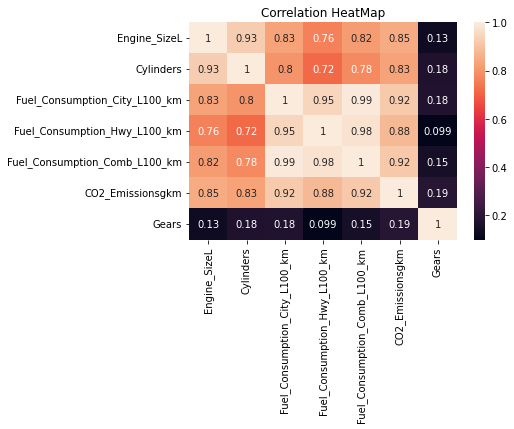

In [124]:
sns.heatmap(co2.drop(columns='Fuel_Consumption_Comb_mpg').corr(), annot=True)
plt.title("Correlation HeatMap")

Which company car model has least emission of Co2 ?

ref:https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html

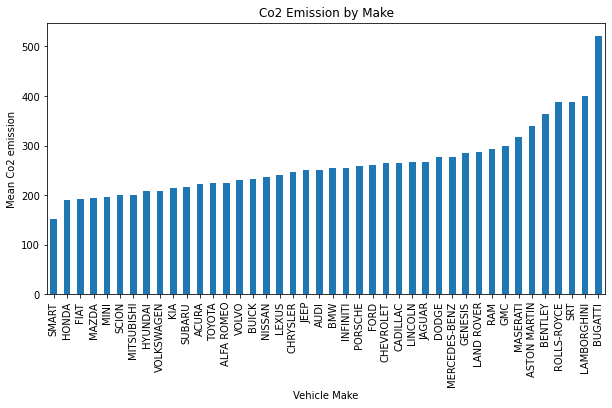

In [108]:
sorted_emission = co2.groupby(by='Make')['CO2_Emissionsgkm'].mean().sort_values()

sorted_emission.plot.bar(figsize=(10,5), ylabel="Mean Co2 emission", xlabel="Vehicle Make", title="Co2 Emission by Make")


In [66]:
co2.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_SizeL', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_L100_km',
       'Fuel_Consumption_Hwy_L100_km', 'Fuel_Consumption_Comb_L100_km',
       'Fuel_Consumption_Comb_mpg', 'CO2_Emissionsgkm', 'Co2_label',
       'Engine_size_label', 'Gears'],
      dtype='object')

In [67]:
min_emission = (co2['Make'] == "SMART")
co2[min_emission][:]

,Make,Model,Vehicle_Class,Engine_SizeL,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Consumption_Comb_L100_km,Fuel_Consumption_Comb_mpg,CO2_Emissionsgkm,Co2_label,Engine_size_label,Gears
943,SMART,FORTWO CABRIOLET,TWO-SEATER,1.0,3,AM5,Z,6.9,5.7,6.4,44,147,Low,Small Engine,5.0
944,SMART,FORTWO COUPE,TWO-SEATER,1.0,3,AM5,Z,6.9,5.7,6.4,44,147,Low,Small Engine,5.0
2072,SMART,FORTWO CABRIOLET,TWO-SEATER,1.0,3,AM5,Z,6.8,6.2,6.5,43,150,Low,Small Engine,5.0
2073,SMART,FORTWO COUPE,TWO-SEATER,1.0,3,AM5,Z,6.8,6.2,6.5,43,150,Low,Small Engine,5.0
3189,SMART,FORTWO CABRIOLET,TWO-SEATER,0.9,3,AM6,Z,7.5,6.1,6.9,41,157,Low,Small Engine,6.0
3190,SMART,FORTWO COUPE,TWO-SEATER,0.9,3,AM6,Z,7.5,6.1,6.9,41,157,Low,Small Engine,6.0
4255,SMART,FORTWO CABRIOLET,TWO-SEATER,0.9,3,AM6,Z,7.0,6.3,6.7,42,152,Low,Small Engine,6.0


Text(0.5, 1.0, 'Engine size histplot')

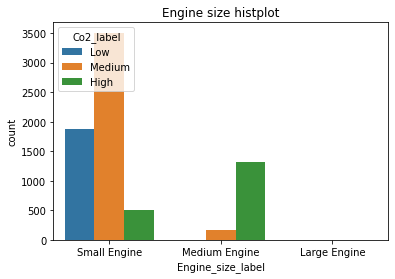

In [122]:
sns.countplot(x=co2.Engine_size_label, hue=co2.Co2_label)
plt.title("Engine size histplot")

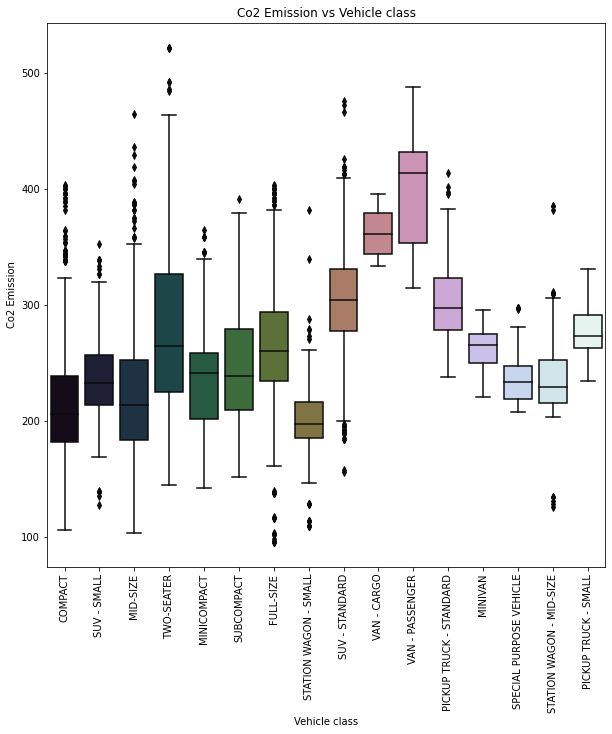

In [121]:
plt.figure(figsize = (10,10))
sns.boxplot(data = co2, x='Vehicle_Class', y='CO2_Emissionsgkm', palette = 'cubehelix')
plt.xticks(rotation = 90)
plt.title("Co2 Emission vs Vehicle class")
plt.xlabel("Vehicle class")
plt.ylabel("Co2 Emission")
plt.show()

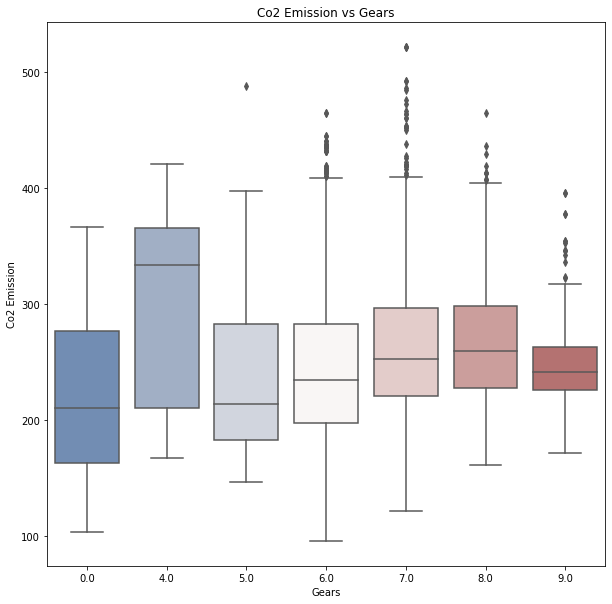

In [120]:
plt.figure(figsize = (10,10))
sns.boxplot(data = co2, x = 'Gears', y = 'CO2_Emissionsgkm', palette = 'vlag')
plt.title("Co2 Emission vs Gears")
plt.ylabel("Co2 Emission")
plt.xlabel("Gears")
plt.show()

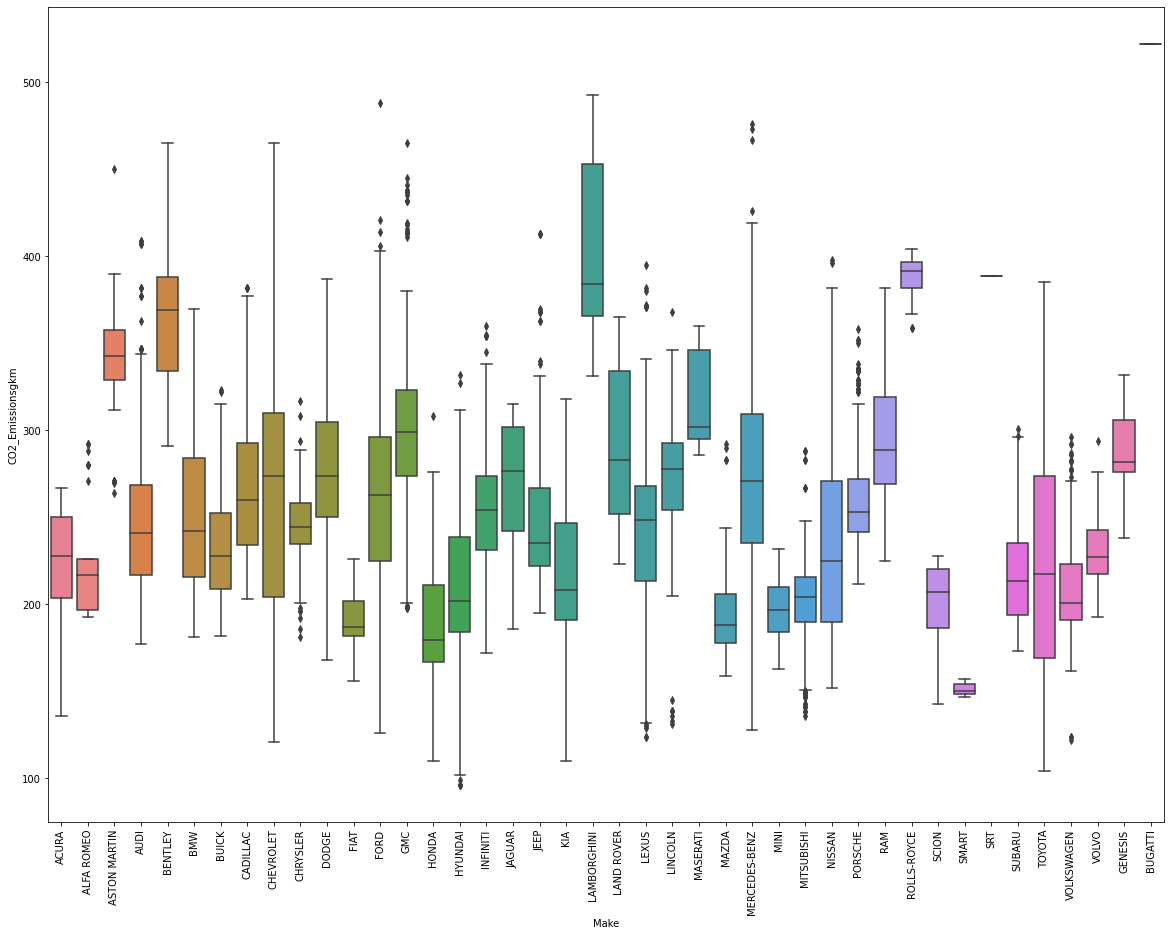

In [119]:
plt.figure(figsize = (20,15))
sns.boxplot(data = co2, x='Make', y='CO2_Emissionsgkm', palette = 'husl')
plt.xticks(rotation = 90)
plt.show()

Highway Fuel Consumption vs City Fuel Consumption with different fuel types.

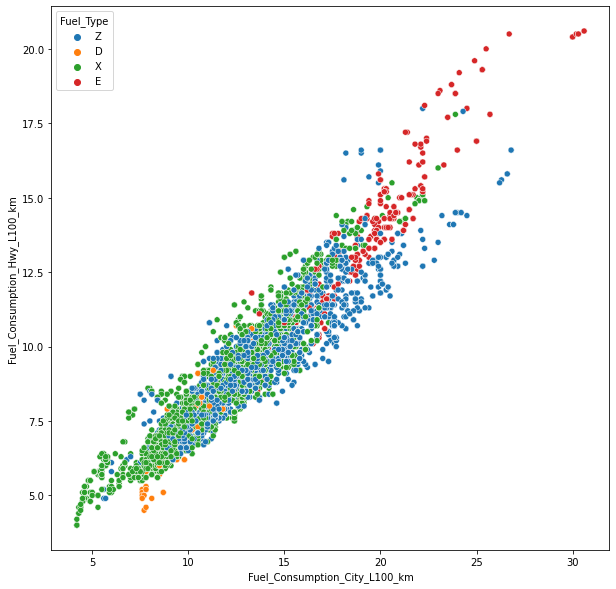

In [72]:

plt.figure(figsize = (10,10))
sns.scatterplot(data = co2, x = 'Fuel_Consumption_City_L100_km', y = 'Fuel_Consumption_Hwy_L100_km', hue = 'Fuel_Type')
plt.show()

In [73]:
city=co2.Fuel_Consumption_City_L100_km
highway = co2.Fuel_Consumption_Hwy_L100_km
city_hwy_df = co2[['Fuel_Consumption_City_L100_km', 'Fuel_Consumption_Hwy_L100_km', 'Fuel_Type','CO2_Emissionsgkm']]
city_hwy_df.head()

,Fuel_Consumption_City_L100_km,Fuel_Consumption_Hwy_L100_km,Fuel_Type,CO2_Emissionsgkm
0,9.9,6.7,Z,196
1,11.2,7.7,Z,221
2,6.0,5.8,Z,136
3,12.7,9.1,Z,255
4,12.1,8.7,Z,244


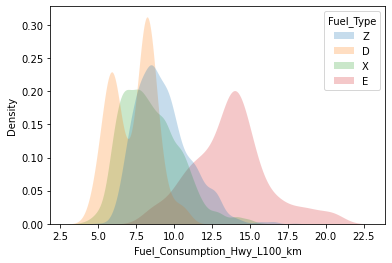

In [74]:
sns.kdeplot(data=city_hwy_df, x="Fuel_Consumption_Hwy_L100_km", hue="Fuel_Type",fill=True, common_norm=False,alpha=.25, linewidth=0)

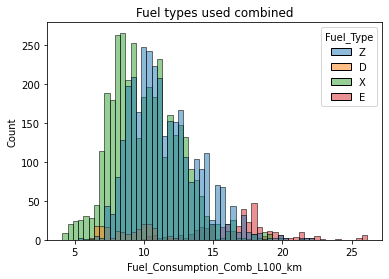

In [129]:
sns.histplot(co2, x="Fuel_Consumption_Comb_L100_km", hue="Fuel_Type")
plt.title('Fuel types used combined')
plt.show()